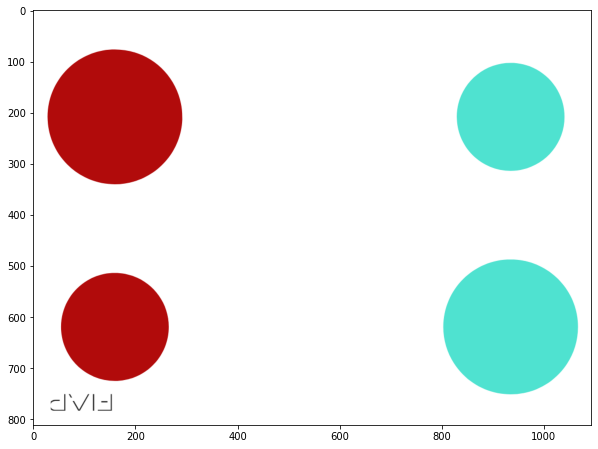

In [1]:
#Mostrar imagem
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('circulos.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()


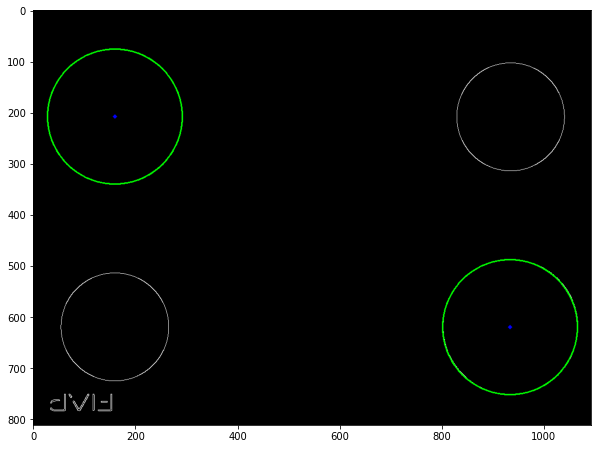

In [3]:
#Converte em BGR e indentifica os circulos maiores
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)
circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=3,minDist=150,param1=200,param2=150,minRadius=130,maxRadius=250)

bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb


if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # desenha o contorno do circulo
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # desenha no centro do circulo
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)
        
plt.figure(figsize = (10,10))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255); plt.show()

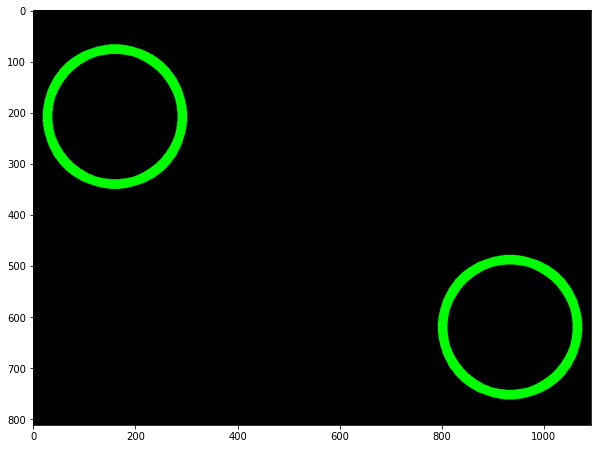

In [4]:
#converte em RGB e inseri os contornos
image_lower_hsv = np.array([0, 255, 0])  
image_upper_hsv = np.array([0, 255, 255])

mask_hsv = cv2.inRange(output, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB)

cv2.drawContours(mask_rgb, contornos, -1, [0, 255, 0], 15);

plt.figure(figsize = (10,10))
plt.imshow(mask_rgb)
plt.show()

(208, 160)
(619, 933)


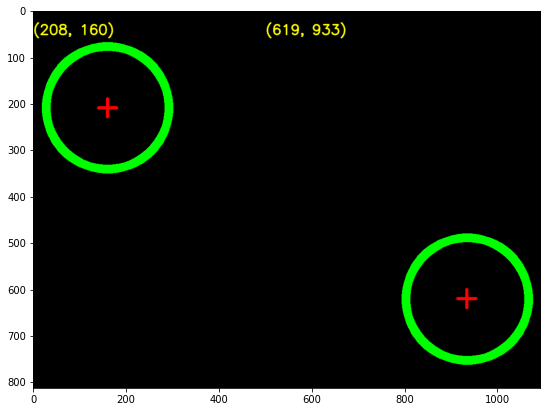

In [5]:
#Criado uma função para desenhar uma cruz

def desenharCruz(maior,x):
    cnt=maior
    M = cv2.moments(cnt)

    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    #desenhar a cruz
    size = 20
    color = (255,0,0)

    cv2.line(mask_rgb,(cx - size,cy),(cx + size,cy),color,5)
    cv2.line(mask_rgb,(cx,cy - size),(cx, cy + size),color,5)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    origem = (x,50)
    text = cy , cx
    cv2.putText(mask_rgb, str(text), origem, font,1,(255,255,0),2,cv2.LINE_AA)        
    return text

posicao = []
posicao.append(desenharCruz(contornos[2],0))
posicao.append(desenharCruz(contornos[1],500))


    
    
print(posicao[0])
print(posicao[1])
fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(mask_rgb);

(619, 933)


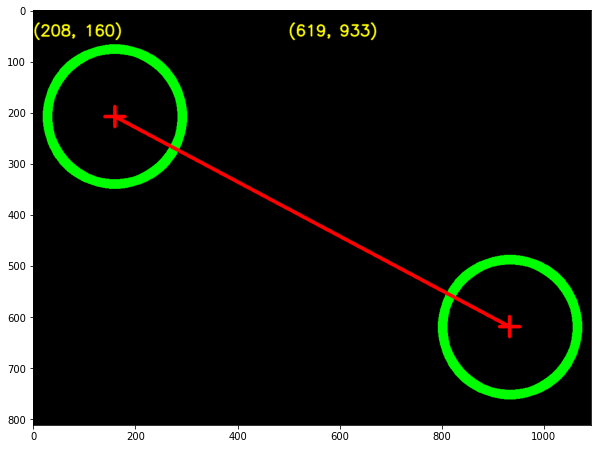

In [6]:
#Traçado uma linha entre os dois circulos

y1,x1 = posicao[0]
y2,x2 = posicao[1]

img_linha = mask_rgb.copy()

cv2.line(img_linha, (x1,y1), (x2,y2 ), (255, 0, 0), 5)

print(posicao[1])

plt.figure(figsize = (10,10))
plt.imshow(img_linha); plt.show()